# Lab 2
#### Simon Jasansky


## Assignment 1.1

In [105]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import data
exp1 = list()
exp1.append(pd.read_csv("data/exp1a.csv"))
exp1.append(pd.read_csv("data/exp1b.csv"))
exp1.append(pd.read_csv("data/exp1c.csv"))

exp2 = list()
exp2.append(pd.read_csv("data/exp2a.csv"))
exp2.append(pd.read_csv("data/exp2b.csv"))

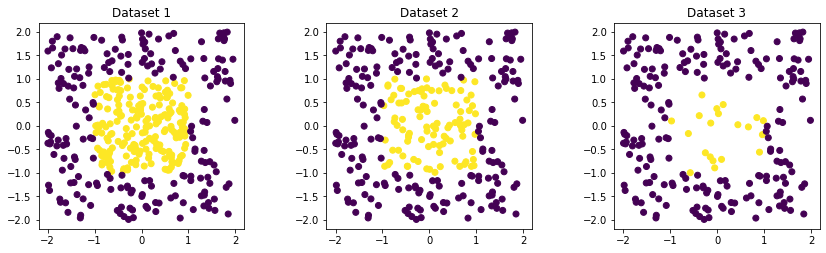

In [133]:
# plot the data
fig = plt.figure(figsize= (14,14))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(0, len(exp1)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(exp1[i]["x"], exp1[i]["y"],
               c = exp1[i]["class"])
    ax.set_title("Dataset " + str(i+1))
    ax.set(adjustable="box", aspect="equal")

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# do knn with 10-fold Cross-Validation
def custom_knn(datasets, weights):

    #initialize data
    accuracy_l = list()
    conf_mat_l = list()

    for i in range(0, len(datasets)):
        X = np.array(datasets[i][["x", "y"]])
        Y = np.array(datasets[i]["class"])

        accuracy_temp = list()
        conf_mat_temp = list()

        for k in [1,5,11,21]:
            classification_method = KNeighborsClassifier(n_neighbors = k, weights=weights)
            Y_pred = cross_val_predict(classification_method, X, Y, cv = 10)
            conf_mat = confusion_matrix(Y, Y_pred)
            accuracy = accuracy_score(Y, Y_pred)
            accuracy_temp.append(accuracy)
            conf_mat_temp.append(conf_mat)
        accuracy_l.append(np.around(np.array(accuracy_temp), 3)) # round accuracy rates
        conf_mat_l.append(conf_mat_temp)

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)
    return(accuracy_df.transpose(), conf_mat_df.transpose())

In [146]:
import matplotlib.gridspec as gridspec

# custom function to plot the confusion matrix
def custom_confusion_matrix_knn(conf_df):
    fig = plt.figure(figsize=(7, 7))
    outer = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20")

    x_outer = [0,0,0,1,1,1,2,2,2,3,3,3]
    y_outer = [0,1,2,0,1,2,0,1,2,0,1,2]
    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    sub_titles_x = ["Dataset 1", "Dataset 2", "Dataset 3"]
    sub_titles_y = ["k = 1", "k = 5", "k = 11", "k = 21"]
    k_count = 0

    for i in range(12):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)
        if i in [0,1,2]:
            ax1 = plt.Subplot(fig, outer[i])
            ax1.set_title(sub_titles_x[i], size = 12)
            ax1.set_xticks([])
            ax1.set_yticks([])
            fig.add_subplot(ax1)

        if i in [0,3,6,9]:
            ax2 = plt.Subplot(fig, outer[i])
            ax2.text(-0.15, 0.4, sub_titles_y[k_count],
                     rotation = 90, size = 12)
            ax2.set_xticks([])
            ax2.set_yticks([])
            fig.add_subplot(ax2)
            k_count += 1

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[x_outer[i], y_outer[i]][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return(fig)

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.952      0.967      0.977
k = 11      0.942      0.947      0.945
k = 21      0.928      0.940      0.936


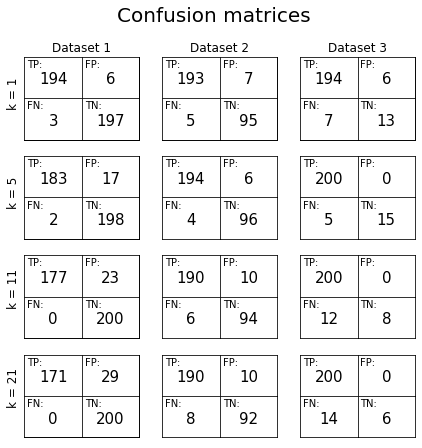

In [147]:
output = custom_knn(exp1, "uniform")
accuracy_df = output[0]
conf_mat_df = output[1]

print(accuracy_df)
custom_confusion_matrix_knn(conf_mat_df)
plt.show()

(b) and (c)
Explain what is going on in the accuracy and confusion matrix

In [137]:
# TODO: plot accuracy rates in line graph
# TODO: Correct the confusion matrices for outputs other than KNN, as they dont have a K!!!!!!

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.968      0.970      0.977
k = 11      0.962      0.960      0.968
k = 21      0.948      0.963      0.968


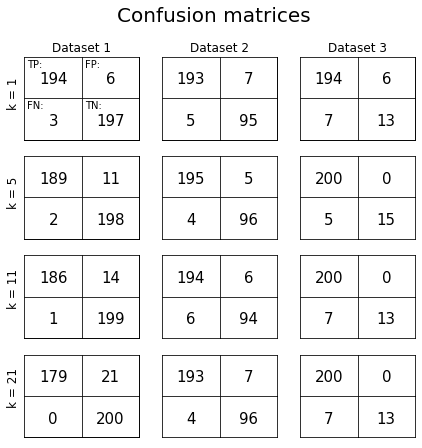

In [138]:
# (d)
# do knn with 10-fold Cross-Validation
output = custom_knn(exp1, "distance")
accuracy_df = output[0]
conf_mat_df = output[1]

print(accuracy_df)
custom_confusion_matrix_knn(conf_mat_df)
plt.show()

In [ ]:
# (e)
def custom_classification(datasets, method):
    #initialize lists
    accuracy_l = list()
    conf_mat_l = list()

    for i in range(0, len(datasets)):
        X = np.array(datasets[i][["x", "y"]])
        Y = np.array(datasets[i]["class"])

        accuracy_temp = list()
        conf_mat_temp = list()

        if(method == "log_reg"):
            classification_method = LogisticRegression()
        if(method == "dec_tree"):
            classification_method = DecisionTreeClassifier()
        Y_pred = cross_val_predict(classification_method, X, Y, cv = 10)
        conf_mat = confusion_matrix(Y, Y_pred)
        accuracy = accuracy_score(Y, Y_pred)
        accuracy_temp.append(accuracy)
        conf_mat_temp.append(conf_mat)

        accuracy_l.append(np.around(np.array(accuracy_temp), 3)) # round accuracy rates
        conf_mat_l.append(conf_mat_temp)

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = [method],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = [method],
                               index = col_names)

    return(accuracy_df.transpose(), conf_mat_df.transpose())


In [169]:
# custom function to plot the confusion matrix
def custom_confusion_matrix(conf_df):
    fig = plt.figure(figsize=(conf_df.shape[1] * 2.5, 2))
    outer = gridspec.GridSpec(1, conf_df.shape[1], wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20", y = 1.3)

    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] *  conf_df.shape[1]
    ds_nr = range(1,( conf_df.shape[1]+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    for i in range(conf_df.shape[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)

        ax1 = plt.Subplot(fig, outer[i])
        ax1.set_title(col_names[i], size = 12)
        ax1.set_xticks([])
        ax1.set_yticks([])
        fig.add_subplot(ax1)

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[x_outer[i], y_outer[i]][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return(fig)

          Dataset 1  Dataset 2  Dataset 3
dec_tree      0.995      0.983      0.982


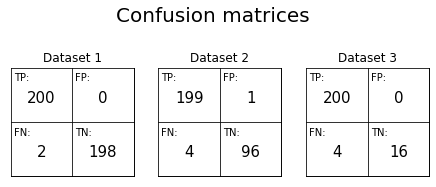

In [170]:

# decision trees
output = custom_classification(exp1, "dec_tree")
accuracy_df = output[0]
conf_mat_df = output[1]

print(accuracy_df)
#print(conf_mat_df)
custom_confusion_matrix(conf_mat_df)
plt.show()

         Dataset 1  Dataset 2  Dataset 3
log_reg      0.522      0.667      0.909


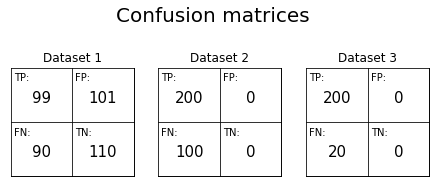

In [172]:
# logistic regression
output = custom_classification(exp1, "log_reg")
accuracy_df = output[0]
conf_mat_df = output[1]

print(accuracy_df)
custom_confusion_matrix(conf_mat_df)
plt.show()

## Assignment 1.2

In [84]:
print(exp2[0].head())
print(exp2[1].head())

print(exp2[0].shape)
print(exp2[1].shape)

print(exp2[0]["class"].unique())
print(exp2[1]["class"].unique())


# Decision trees

# Nearest neighbor

# Naive Bayes

# Logistic Regression

# SVMs


   a0001  a0003  a0005  a0007  class
0      1      0      0      1      1
1      1      0      0      1      1
2      1      0      0      1      1
3      1      0      0      1      1
4      1      0      0      1      1
   a0001  a0002  a0003  a0004  a0005  a0006  a0007  a0008  a0009  a0010  ...  \
0      1   0.95      0   0.16      0   0.99      1   0.08   0.49    550  ...   
1      1   0.23      0   0.42      0   0.89      1   0.30   0.41    860  ...   
2      1   0.61      0   0.09      0   0.40      1   0.18   0.98    460  ...   
3      1   0.49      0   0.45      0   0.63      1   0.72   0.55    710  ...   
4      1   0.89      0   0.87      0   0.39      1   0.79   0.68    330  ...   

   a0091  a0092  a0093  a0094  a0095  a0096  a0097  a0098  a0099  class  
0    130    610    260    530    760    990    450    760    640      1  
1    490    640    960    770    700    750    950     80    440      1  
2    820    150    120    610    690    890    470    190    950      1  
3